### import necessary libraries

In [552]:
import pandas as pd
import os

### Merging 12 months of sales data into single file

In [554]:
# Path to the directory containing the sales data
data_dir = './Sales_Data'
# List all CSV files in the directory
files = [file for file in os.listdir(data_dir) if file.endswith('.csv')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [555]:
# Read and concatenate all CSV files
all_months = pd.concat([pd.read_csv(os.path.join(data_dir,file)) for file in sorted(files)])

In [556]:
all_months

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [557]:
# write into csv
all_months.to_csv('./all_months.csv', index=False)

In [558]:
# read the all data into df
df = pd.read_csv('./all_months.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean up the data

#### rows with nan

In [561]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [562]:
type(df)

pandas.core.frame.DataFrame

In [563]:
df.dropna(how='all',inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [564]:
type(df)

pandas.core.frame.DataFrame

#### ValueError: invalid literal for int() with base 10: 'Quantity Ordered' delete rows with this str literal

#### Remove incorrect values in 'Quantity Ordered'

In [567]:

df['Quantity Ordered'].value_counts()

Quantity Ordered
1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: count, dtype: int64

In [568]:
df= df[df['Quantity Ordered']!='Quantity Ordered'].copy()

In [569]:
df['Quantity Ordered'].value_counts()

Quantity Ordered
1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: count, dtype: int64

In [570]:
df.shape

(185950, 6)

#### change 'Price Each' type from str to float

In [572]:
df['Price Each']=df['Price Each'].astype('float')
df.dtypes

Order ID             object
Product              object
Quantity Ordered     object
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#### convert quantity ordered to int

In [574]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')

### Augment data with additional columns

### Add Month Column

In [577]:
df['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 185950, dtype: object

In [578]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%y %H:%M', errors='coerce')
df['month']=df['Order Date'].dt.month

In [579]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


### Add sales column

In [581]:
df['Sales']=df['Quantity Ordered']*df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


#### 1. What was the best month for sales? How much was earned that month

In [583]:
result = df.groupby('month')['Sales'].sum()
result

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [584]:
best_month = result.idxmax()
sales = result.max()
print(f'best month is {best_month} and earnings in that month are {sales}')


best month is 12 and earnings in that month are 4613443.34


In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 11.3+ MB


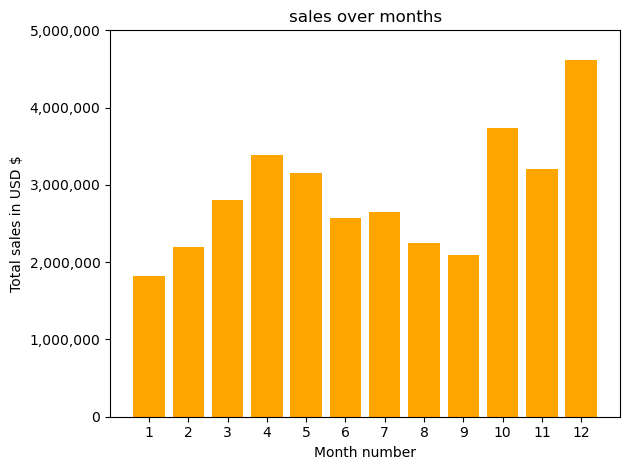

In [586]:
import matplotlib.pyplot as plt
plt.bar(result.index, result.values, color='orange')
plt.xticks(result.index)
# Get current y-ticks
y_ticks = plt.yticks()[0]

# Format them with commas
formatted_labels = [f'{int(y):,}' for y in y_ticks]

# Apply formatted labels
plt.yticks(y_ticks, formatted_labels)
plt.title('sales over months')
plt.xlabel('Month number')
plt.ylabel('Total sales in USD $')
plt.tight_layout()

## 2. What city has the highest number of sales

In [588]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


#### create a column for city name from purchase address

In [590]:
def get_city(addr):
    return addr.split(',')[1].strip()
def get_state(addr):
    state_zip = addr.split(',')[2].strip()
    return ' ('+state_zip.split(' ')[0]+')'
df['City']=df['Purchase Address'].apply(lambda x: get_city(x) + get_state(x))

In [591]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [592]:
results = df.groupby('City')['Sales'].sum().sort_values()
results

City
Portland (ME)          449758.27
Austin (TX)           1819581.75
Portland (OR)         1870732.34
Seattle (WA)          2747755.48
Dallas (TX)           2767975.40
Atlanta (GA)          2795498.58
Boston (MA)           3661642.01
New York City (NY)    4664317.43
Los Angeles (CA)      5452570.80
San Francisco (CA)    8262203.91
Name: Sales, dtype: float64

In [593]:
results.idxmax()

'San Francisco (CA)'

In [594]:
results.max()

8262203.91

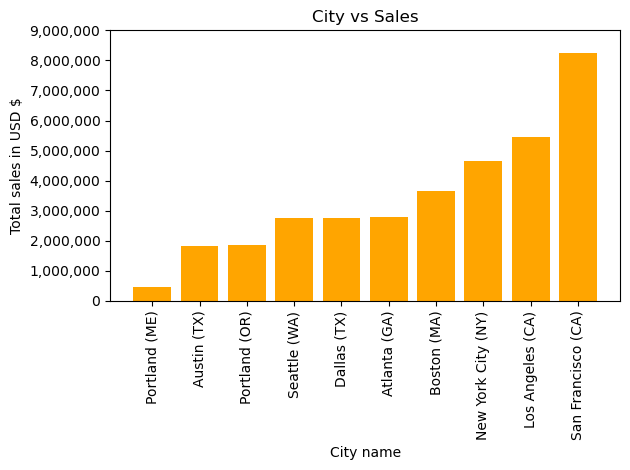

In [595]:
plt.bar(results.index, results.values, color='orange')
plt.xticks(results.index)
# Get current y-ticks
y_ticks = plt.yticks()[0]

# Format them with commas
formatted_labels = [f'{int(y):,}' for y in y_ticks]

# Apply formatted labels
plt.yticks(y_ticks, formatted_labels)
plt.title('City vs Sales')
plt.xlabel('City name')
plt.xticks(results.index, rotation = 'vertical')
plt.ylabel('Total sales in USD $')
plt.tight_layout()

## 3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [597]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Add time of order column

In [599]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [600]:
result_hour = df.groupby('Hour')['Sales'].sum()
result_hour

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

In [601]:
result_hour.idxmax()

19

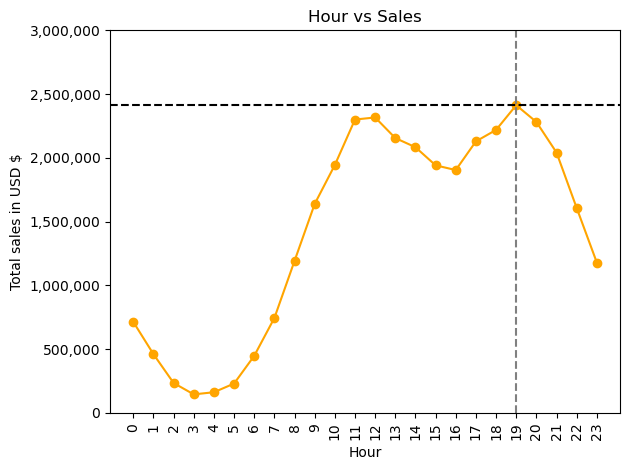

In [602]:
plt.plot(result_hour.index, result_hour.values, color='orange', marker='o')
plt.xticks(result_hour.index)
# Get current y-ticks
y_ticks = plt.yticks()[0]

# Format them with commas
formatted_labels = [f'{int(y):,}' for y in y_ticks]
peak_hour = result_hour.idxmax()
peak_sales = result_hour.max()
plt.axvline(x=peak_hour, color='gray', linestyle='--',label=f'Peak Hour: {peak_hour}')
plt.axhline(y=peak_sales, color='black', linestyle='--', label=f'Peak Sales: {int(peak_sales):,}')
# Apply formatted labels
plt.yticks(y_ticks, formatted_labels)
plt.title('Hour vs Sales')
plt.xlabel('Hour')
plt.xticks(rotation = 'vertical')
plt.ylabel('Total sales in USD $')
plt.tight_layout()

## 4. What products are most often sold together

In [604]:
df.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),7
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),10
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),10
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),14


In [605]:
products = df.groupby('Order ID')['Product'].apply(list)
products = products[products.apply(len)>1].apply(lambda x: ','.join(x))
products

Order ID
141275              USB-C Charging Cable,Wired Headphones
141290     Apple Airpods Headphones,AA Batteries (4-pack)
141365                   Vareebadd Phone,Wired Headphones
141384                  Google Phone,USB-C Charging Cable
141450            Google Phone,Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop,Wired Headphones
319556                      Google Phone,Wired Headphones
319584                            iPhone,Wired Headphones
319596                    iPhone,Lightning Charging Cable
319631    34in Ultrawide Monitor,Lightning Charging Cable
Name: Product, Length: 7136, dtype: object

In [606]:

# order_lengths = products.apply(len)
# max_prods = order_lengths.max()
# max_prods
# prod_sold_together = products[order_lengths==max_prods]
# for prod in prod_sold_together.apply(list):
#     print(prod)

In [607]:
products_df = products.reset_index()

In [608]:
products_df['Product'].value_counts()

Product
iPhone,Lightning Charging Cable                                                882
Google Phone,USB-C Charging Cable                                              856
iPhone,Wired Headphones                                                        361
Vareebadd Phone,USB-C Charging Cable                                           312
Google Phone,Wired Headphones                                                  303
                                                                              ... 
Google Phone,USB-C Charging Cable,USB-C Charging Cable                           1
ThinkPad Laptop,27in 4K Gaming Monitor                                           1
iPhone,Google Phone                                                              1
Vareebadd Phone,27in FHD Monitor                                                 1
Google Phone,USB-C Charging Cable,Wired Headphones,Apple Airpods Headphones      1
Name: count, Length: 366, dtype: int64

In [609]:
for _, row in products_df.iterrows():
    print(f'({row['Product']}) {row['Order ID']}, ')

(USB-C Charging Cable,Wired Headphones) 141275, 
(Apple Airpods Headphones,AA Batteries (4-pack)) 141290, 
(Vareebadd Phone,Wired Headphones) 141365, 
(Google Phone,USB-C Charging Cable) 141384, 
(Google Phone,Bose SoundSport Headphones) 141450, 
(iPhone,Apple Airpods Headphones) 141457, 
(Google Phone,Apple Airpods Headphones) 141478, 
(iPhone,Apple Airpods Headphones,Wired Headphones) 141550, 
(USB-C Charging Cable,Apple Airpods Headphones) 141587, 
(Lightning Charging Cable,Wired Headphones) 141645, 
(iPhone,Lightning Charging Cable) 141738, 
(27in FHD Monitor,Bose SoundSport Headphones) 141782, 
(Google Phone,USB-C Charging Cable) 141789, 
(iPhone,Wired Headphones) 141795, 
(Google Phone,USB-C Charging Cable) 141809, 
(AA Batteries (4-pack),AAA Batteries (4-pack)) 141843, 
(Vareebadd Phone,USB-C Charging Cable,Wired Headphones) 141900, 
(Google Phone,USB-C Charging Cable) 141901, 
(Vareebadd Phone,Wired Headphones) 141910, 
(34in Ultrawide Monitor,Lightning Charging Cable) 141939, 

## 5. What products sold the most? why do you think it sold the most

In [611]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [612]:
product_group = df.groupby('Product')['Quantity Ordered']

In [613]:
result_sum = product_group.sum()
result_sum

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [614]:
most_sold_prod = result_sum.idxmax()
total_sales = result_sum.max()
print(f'Most sold product is "{most_sold_prod}" and the total sales are "{total_sales}"')

Most sold product is "AAA Batteries (4-pack)" and the total sales are "31017"


In [615]:
price_mean = df.groupby('Product')['Price Each'].mean()
price_mean

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\shrav\AppData\Local\Temp\ipykernel_40440\3838105081.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(result_sum.index, rotation='vertical')


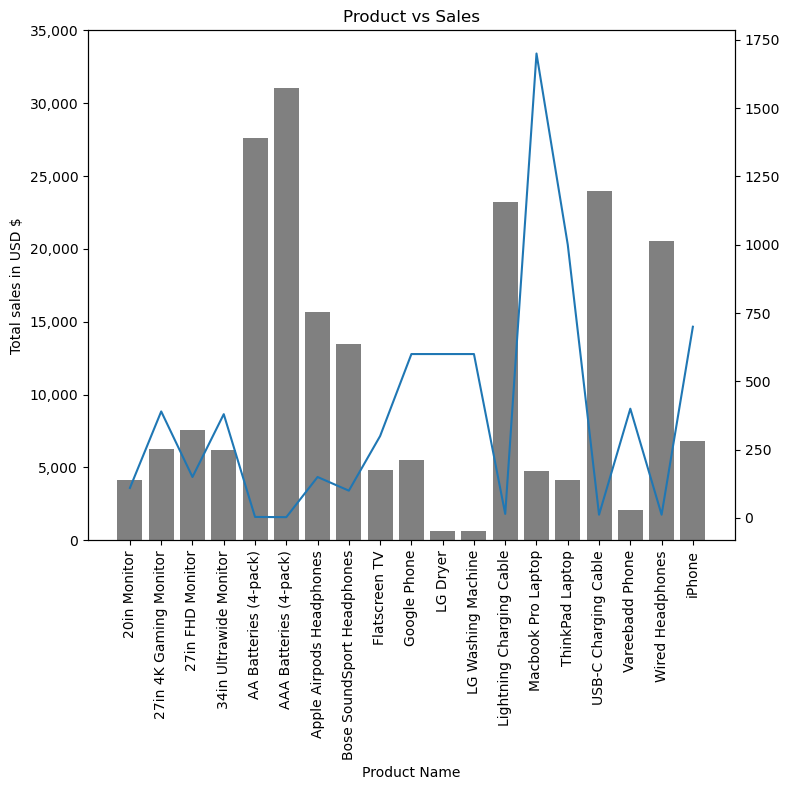

In [616]:
# Let's plot a bar chart 
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.bar(result_sum.index, result_sum.values, color='gray')
# Get current y-ticks
y_ticks = ax1.get_yticks()

# Format them with commas
formatted_labels = [f'{int(y):,}' for y in y_ticks]

# Apply formatted labels
ax1.set_yticks(y_ticks, formatted_labels)
plt.title('Product vs Sales')
ax1.set_xlabel('Product Name')
ax1.set_xticklabels(result_sum.index, rotation='vertical')
ax1.set_ylabel('Total sales in USD $')

#axis 2
ax2 = ax1.twinx()
ax2.plot(price_mean.index, price_mean.values)
plt.tight_layout()
